In [9]:
from keras.models import Sequential   # models 서브패키지
from keras.layers import Dense        # layers => 모델 구성
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler # 정규화
X , y = make_regression(n_samples=100, n_features=2,  # 회귀를 위한 데이터
                       noise=0.1, random_state=1)
#print(y) 100 # 행으로 나옴
#print(X) 100x2
print(y.shape)
print(X.shape)
scalarX, scalarY = MinMaxScaler(), MinMaxScaler() # 값의 범위가 다르므로
scalarX.fit(X) # minmax값 구해짐
scalarY.fit(y.reshape(100,1)) # 
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1)) # 행으로 나온 y를 열로 만들기 위해
print(y.shape)

# keras model
model = Sequential()
# 입력데이터 :100x2  # 출력차수:4 ==> 가중치: 2x4 ====> 100x4로 출력 
model.add(Dense(4, input_dim= 2, activation = 'relu'))
# 입력데이터 : 100x4 # 출력차수:4 ==> 가중치: 4x4 ===> 100x4로 출력
model.add(Dense(4, activation='relu'))
# 입력데이터 : 100x4 # 출력차수:1 ==> 가중치: 4x1 ===> 100x1로 출력
model.add(Dense(1, activation ='linear'))

#backend : tensorflow
# loss_function : mse(회귀), cross_entropy(분류), KL-divergence(GAN : 분포를 비교)
model.compile(loss='mse', optimizer='adam') # compile에서는 텐서플로우로 모델을 변환
model.fit(X,y,epochs= 1000, verbose = 0) # tensor에서 for문 부분
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)) :
    print('입력데이터=%s, 예측결과 =%s' % (Xnew[i], ynew[i]))
    

(100,)
(100, 2)
(100, 1)






입력데이터=[0.29466096 0.30317302], 예측결과 =[0.17303406]
입력데이터=[0.39445118 0.79390858], 예측결과 =[0.744189]
입력데이터=[0.02884127 0.6208843 ], 예측결과 =[0.40246224]


In [2]:
#dataset

In [3]:
from keras.models import Sequential  # 입력이 1개, 아웃풋 1개
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt('pima.data', delimiter=',')
X = dataset[:,0:8]  # 8개 독립변수
print(X.shape)
Y = dataset[:,8]    # 9번쨰 : 독립변수
print(Y.shape)
model = Sequential()
# 입력데이터 : ? x 8  # 가중치 : 8x12 ==> ? x 12
model.add(Dense(12, input_dim=8, activation='relu'))
# ? x 12  => 12x8  ==> ?x8
model.add(Dense(8, activation='relu'))
# ?x8 => 8x1  ==> ?x1
model.add(Dense(1, activation='sigmoid')) # 0.5기준으로 크면 1, 아니면 0
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics = ['accuracy'])  # [loss, optimizer, metrics]
history = model.fit(X,Y,validation_split=0.33, epochs=150, batch_size= 10)
scores = model.evaluate(X,Y)
# 2번쨰 : accuracy
print('\n%s : %.2f%%' % (model.metrics_names[1], scores[1]*100))


(768, 8)
(768,)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 2s 3ms/step - loss: 5.7737 - acc: 0.6401 - val_loss: 4.9573 - val_acc: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 518us/step - loss: 3.1462 - acc: 0.5409 - val_loss: 1.0841 - val_acc: 0.5709
Epoch 3/150
514/514 [==============================] - 0s 274us/step - loss: 0.9595 - acc: 0.5778 - val_loss: 0.7705 - val_acc: 0.6693
Epoch 4/150
514/514 [==============================] - 0s 274us/step - loss: 0.7837 - acc: 0.6070 - val_loss: 0.7753 - val_acc: 0.6417
Epoch 5/150
514/514 [==============================] - 0s 281us/step - loss: 0.7398 - acc: 0.6498 - val_loss: 0.7275 - val_acc: 0.6260
Epoch 6/150
514/514 [==============================] - 0s 357us/step - loss: 0.7142 - acc: 0.6537 - val_loss: 0.7038 - val_acc: 0.6575
Epoch 7/150
514/514 [===============

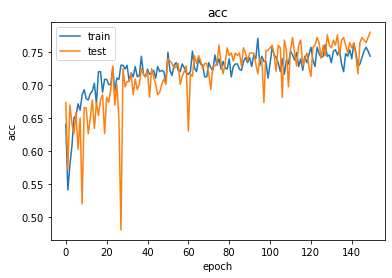

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [6]:
# 위에꺼랑 비슷

from keras.models import Sequential  # 입력이 1개, 아웃풋 1개
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt('pima.data', delimiter=',')
X = dataset[:,0:8]  # 8개 독립변수
print(X.shape)
Y = dataset[:,8]    # 9번쨰 : 독립변수
print(Y.shape)
model = Sequential()
# 입력데이터 : ? x 8  # 가중치 : 8x12 ==> ? x 12
model.add(Dense(12, input_dim=8,kernel_initializer='uniform', activation='relu'))  # 초기화 방법 지정
# ? x 12  => 12x8  ==> ?x8
model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
# ?x8 => 8x1  ==> ?x1
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid')) # 0.5기준으로 크면 1, 아니면 0
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics = ['accuracy'])  # [loss, optimizer, metrics]

# 데이터 분리 입력( train, test ) : 과적합될 수 있음 => 검증용 데이터로 나눠서 test
# train, validation , test 
history = model.fit(X,Y,validation_split=0.33, epochs=150, batch_size= 10)
scores = model.evaluate(X,Y)
# 2번쨰 : accuracy
print('\n%s : %.2f%%' % (model.metrics_names[1], scores[1]*100))


(768, 8)
(768,)
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 2s 3ms/step - loss: 0.6799 - acc: 0.6401 - val_loss: 0.6586 - val_acc: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 425us/step - loss: 0.6690 - acc: 0.6401 - val_loss: 0.6532 - val_acc: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 309us/step - loss: 0.6618 - acc: 0.6381 - val_loss: 0.6515 - val_acc: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 308us/step - loss: 0.6550 - acc: 0.6401 - val_loss: 0.6471 - val_acc: 0.6850
Epoch 5/150
514/514 [==============================] - 0s 264us/step - loss: 0.6463 - acc: 0.6401 - val_loss: 0.6381 - val_acc: 0.6969
Epoch 6/150
514/514 [==============================] - 0s 314us/step - loss: 0.6408 - acc: 0.6420 - val_loss: 0.6274 - val_acc: 0.7047
Epoch 7/150
514/514 [==============================] - 0s 318us/step - loss: 0.6321 - acc: 0.6556 - val_loss: 0.6189 - val_acc: 0.

In [7]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


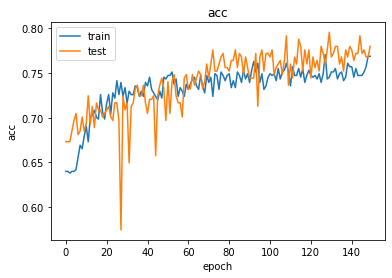

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

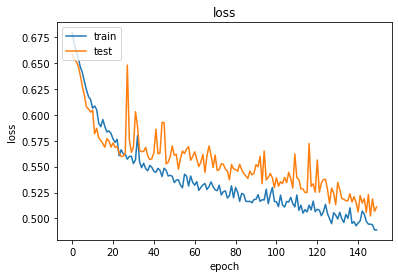

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [10]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, Y = make_moons(noise=0.2, random_state=0, n_samples= 1000)
print(X.shape)
print(Y.shape)
X= scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5)


(1000, 2)
(1000,)


[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classification')]

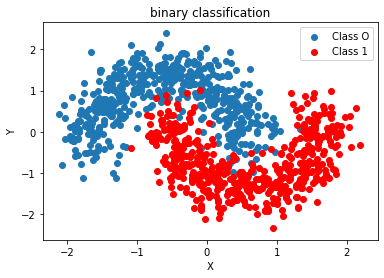

In [11]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0,1], label = 'Class O')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='binary classification')

# ==> 비선형으로 분류 필요

In [12]:
# 신경망은 비선형 문제 해결 가능
import keras

model = Sequential()  
# 1000x2 # 2x32 ==> 1000x32 ### 차원확대 (2개의 변수를 32개로 설명)
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'AdaDelta',
             loss = 'binary_crossentropy',
             metrics= ['accuracy'])

# call_back 함수 : window에서 자동으로 호출되어지는 함수
tb_callback = keras.callbacks.TensorBoard(  
    log_dir = './Graph/model_1/',
    histogram_freq=100, write_graph = True,
    write_images = False)
tb_callback.set_model(model)  # call_back을 모델에 등록

In [13]:
hist = model.fit(X_train, Y_train, batch_size = 32, epochs =200, 
                verbose = 0, validation_data = (X_test, Y_test), callbacks = [tb_callback])

In [13]:
score = model.evaluate(X_test, Y_test, verbose= 0)
print("Test loss :", score[0])
print("Test Accuracy: ", score[1])

Test loss : 0.12795892786979676
Test Accuracy:  0.9499999990463257


In [14]:
keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [15]:
keras.utils.plot_model(model)

In [16]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

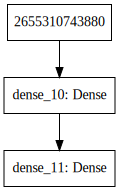

In [17]:
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [2]:
import keras
# Callback class
# custom callback함수의 생성
# 함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback):  # 상속
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc= []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}):  # 오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

Using TensorFlow backend.
C:\Users\happy\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\happy\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\happy\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\happy\Anaconda3\envs\te

In [3]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)  # 60000, 28x28
print(y_train0.shape, y_train0.dtype) # 60000
print(X_test0.shape, X_test0.dtype)    # 10000 28x28
print(y_test0.shape, y_test0.dtype)    # 10000


11493376/11490434 [==============================] - 44s 4us/step
(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


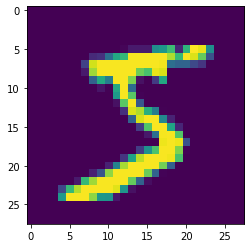

In [4]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [5]:
# fully-connected : flatten  ==> FFNN은 데이터가 한줄로 들어감
X_train = X_train0.reshape(60000,784).astype('float32')/255.0
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [6]:
y_train0[:5] # one-hot encoding 여부
# multi- label==> softmax(경우의 수에 대한 확률값)

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
from keras.utils import np_utils
Y_train = keras.utils.np_utils.to_categorical(y_train0,10)
Y_test = keras.utils.np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
import numpy as np
import numpy as np
from keras.optimizers import SGD
np.random.seed(0)
model = Sequential()
model.add(Dense(512, input_dim=784, activation = 'sigmoid'))
model.add(Dense(15)) # default가 있음
model.add(Dense(10, activation='sigmoid'))
#lr : learning_rate
#sgd : stochatic gradient descent
model.compile(optimizer=SGD(lr=0.2), loss= 'mean_squared_error',
             metrics=['accuracy'])

In [11]:
model.layers

In [13]:
l1 = model.layers[0]
l2 = model.layers[1]
# 레이어 속성으로 정보 확인
print(l1.name)
print(l1.input_shape)
print(l1.output_shape)
l1.activation

dense_4
(None, 784)
(None, 512)


<function keras.activations.sigmoid(x)>

In [ ]:
custom_hist = CustomHistory()
custom_hist.init()
hist = model.fit(X_train,Y_train,nb_epoch=30, batch_size = 100,
       validation_data = (X_test, Y_test), callbacks=[custom_hist])
hist.history['loss']

Train on 60000 samples, validate on 10000 samples
Epoch 1/30


C:\Users\ICT01_18\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


 - 2s - loss: 0.0174 - acc: 0.9069 - val_loss: 0.0165 - val_acc: 0.9120
Epoch 2/30
 - 2s - loss: 0.0173 - acc: 0.9071 - val_loss: 0.0164 - val_acc: 0.9115
Epoch 3/30
 - 2s - loss: 0.0172 - acc: 0.9079 - val_loss: 0.0162 - val_acc: 0.9130
Epoch 4/30
 - 2s - loss: 0.0171 - acc: 0.9080 - val_loss: 0.0162 - val_acc: 0.9130
Epoch 5/30
 - 2s - loss: 0.0170 - acc: 0.9085 - val_loss: 0.0161 - val_acc: 0.9132
Epoch 6/30
 - 2s - loss: 0.0169 - acc: 0.9099 - val_loss: 0.0161 - val_acc: 0.9150
Epoch 7/30
 - 2s - loss: 0.0169 - acc: 0.9097 - val_loss: 0.0160 - val_acc: 0.9133
Epoch 8/30
 - 2s - loss: 0.0168 - acc: 0.9107 - val_loss: 0.0160 - val_acc: 0.9147
Epoch 9/30
 - 2s - loss: 0.0167 - acc: 0.9115 - val_loss: 0.0158 - val_acc: 0.9150
Epoch 10/30
 - 2s - loss: 0.0166 - acc: 0.9113 - val_loss: 0.0159 - val_acc: 0.9160
Epoch 11/30
 - 2s - loss: 0.0165 - acc: 0.9114 - val_loss: 0.0156 - val_acc: 0.9154
Epoch 12/30
 - 2s - loss: 0.0164 - acc: 0.9120 - val_loss: 0.0157 - val_acc: 0.9159
Epoch 13/30


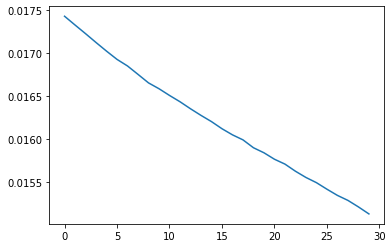

In [29]:
hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size = 100,
                 validation_data=(X_test,Y_test), verbose=2)
plt.plot(hist.history['loss'])
plt.show()

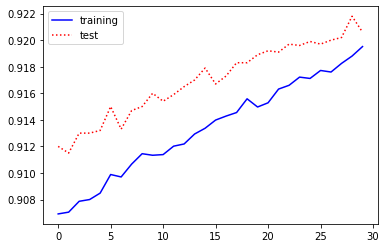

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}
[0.9069166693091393, 0.9070500017205874, 0.9078666693965594, 0.9080000018080076, 0.9084833353757858, 0.9098833349347114, 0.9097000019749005, 0.9106666691104571, 0.9114500028888385, 0.911333336631457, 0.9113833341002464, 0.9120166688164075, 0.9121833350261053, 0.9129333348075549, 0.9133666687210401, 0.9139833360910415, 0.9142833349108695, 0.9145500023166339, 0.9155833352605501, 0.9149666679898898, 0.9152833350499471, 0.9163166675964991, 0.9166000013550123, 0.9172166686256726, 0.9171166690190633, 0.9177166698376338, 0.9176000020901363, 0.9182500026623408, 0.918800002237161, 0.9195166673262914]
0.9205999988317489


In [52]:
plt.plot(hist.history['acc'], 'b-', label='training')
plt.plot(hist.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['acc'])
print(hist.history['val_acc'][29])
plt.show()
#plt(custom_hist, train_loss, 'y', label = 'train loss')
plt.show()

In [53]:
# 문제 : X_test의 이미지 한장의 label을 예측
model.predict(X_test[:1,:])
model.predict_classes(X_test[:1,:], verbose = 0)

array([7], dtype=int64)

In [54]:
# 문제 : 출력차수가 512인 레이어를 추가하세요
# model.add 부분에 좁히기 전에 512를 먼저 추가함
# 이후 15 10 순

In [55]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test,y_test) = boston_housing.load_data()
print(x_train.shape) # 402x13
print(y_train.shape) # 404
print(x_test.shape) # 102 x13
print(y_test.shape) # 102
num_features = 13

(404, 13)
(404,)
(102, 13)
(102,)


In [56]:
model = Sequential()
model.add(Dense(1, input_dim = num_features, activation = 'linear'))  # 회귀
model.summary()
model.compile(optimizer = 'rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train,y_train, batch_size=1, epochs=10, verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 1s 3ms/step - loss: 3625.0494 - mean_absolute_error: 46.2068
Epoch 2/10
404/404 [==============================] - 0s 838us/step - loss: 426.8992 - mean_absolute_error: 16.5710
Epoch 3/10
404/404 [==============================] - 0s 798us/step - loss: 191.6205 - mean_absolute_error: 10.5555
Epoch 4/10
404/404 [==============================] - 0s 799us/step - loss: 136.0928 - mean_absolute_error: 8.5685
Epoch 5/10
404/404 [==============================] - 0s 785us/step - loss: 108.5070 - mean_absolute_error: 7.7024
Epoch 6/10
404/404 [==============================] - 0s 787us/step - loss: 90.0912 - mean_absolu

In [57]:

# 위에서 loss는 mse,  metrics에 mae로 지정
mse , mae = model.evaluate(x_test, y_test, verbose=False)  
rmse = np.sqrt(mse)
mse, rmse, mae

(64.38426043940525, 8.023980336429375, 5.902008168837604)

In [58]:
# 문제 : x_test의 앞의 3집을 예측
pred = model.predict(x_test[:3,:]).reshape(3)
print(pred)
real = y_test[:3]
print(real)

[ 7.626141 21.00255  23.900782]
[ 7.2 18.8 19. ]


In [59]:
# 상관계수 확인
np.corrcoef(pred,real)

array([[1.        , 0.98833268],
       [0.98833268, 1.        ]])

In [60]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy

# scikit와 keras를 연결 : kerasClassifier, kerasRegression

In [61]:
# 768 x 9 => 768x8 => 768x1
# 변수의 개수 : 8
def  create_model() :
    model = Sequential()
    # 가중치 : 8x12 => 768x12
    model.add(Dense(12, input_dim=8, activation = 'relu'))
    # 가중치 : 12x1 => 768x1
    model.add(Dense(1, activation = 'sigmoid')) # 0~1사이값
    model.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])
    return model
seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt('pima.csv', delimiter=',')
X = dataset[:,:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn = create_model, verbose=0)

In [62]:
# 파라미터 조합
batch_size  = [10,20,40,60,80,100]
epochs = [10,50,100]

# 매개변수에 데이터를 넣을때는 dictionary형태 사용
param_grid = dict(batch_size = batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model , param_grid = param_grid, n_jobs=1) # n_job : cpu개수
grid_result = grid.fit(X,Y)
print("최적스코어 : %f     사용한 파라미터 조합 :  %s" % (grid_result.best_score_,
                                           grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

최적스코어 : 0.669281     사용한 파라미터 조합 :  {'batch_size': 10, 'epochs': 50}
0.629013 (0.038713) with: {'batch_size': 10, 'epochs': 10}
0.669281 (0.047278) with: {'batch_size': 10, 'epochs': 50}
0.656370 (0.047411) with: {'batch_size': 10, 'epochs': 100}
0.566370 (0.070594) with: {'batch_size': 20, 'epochs': 10}
0.665351 (0.051289) with: {'batch_size': 20, 'epochs': 50}
0.668059 (0.045866) with: {'batch_size': 20, 'epochs': 100}
0.591155 (0.100075) with: {'batch_size': 40, 'epochs': 10}
0.655004 (0.052910) with: {'batch_size': 40, 'epochs': 50}
0.622570 (0.110312) with: {'batch_size': 40, 'epochs': 100}
0.566539 (0.109643) with: {'batch_size': 60, 'epochs': 10}
0.643392 (0.116750) with: {'batch_size': 60, 'epochs': 50}
0.616102 (0.135312) with: {'batch_size': 60, 'epochs': 100}
0.559740 (0.109191) with: {'batch_size': 80, 'epochs': 10}
0.647076 (0.037633) with: {'batch_size': 80, 'epochs': 50}
0.602716 (0.134668) with: {'batch_size': 80, 'epochs': 100}
0.561514 (0.111328) with: {'batch_size': 

In [63]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])
    return model

seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("pima.data", delimiter=",") #원랜 csv인데 없당
X = dataset[:, 0:8]
Y = dataset[:, 8]
model = KerasClassifier(build_fn=create_model, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                   n_jobs=-1)
grid_result = grid.fit(X, Y)
print("최적스코어: %f   사용한 파라미터조합 : %s" % (grid_result.best_score_,
                                      grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

최적스코어: 0.721458   사용한 파라미터조합 : {'batch_size': 10, 'epochs': 100}
0.565275 (0.101007) with: {'batch_size': 10, 'epochs': 10}
0.656489 (0.125823) with: {'batch_size': 10, 'epochs': 50}
0.721458 (0.055916) with: {'batch_size': 10, 'epochs': 100}
0.529930 (0.127191) with: {'batch_size': 20, 'epochs': 10}
0.697920 (0.043318) with: {'batch_size': 20, 'epochs': 50}
0.639615 (0.151979) with: {'batch_size': 20, 'epochs': 100}
0.609498 (0.059949) with: {'batch_size': 40, 'epochs': 10}
0.674527 (0.022242) with: {'batch_size': 40, 'epochs': 50}
0.623538 (0.143974) with: {'batch_size': 40, 'epochs': 100}
0.565359 (0.132031) with: {'batch_size': 60, 'epochs': 10}
0.681020 (0.044591) with: {'batch_size': 60, 'epochs': 50}
0.692768 (0.041861) with: {'batch_size': 60, 'epochs': 100}
0.540582 (0.094992) with: {'batch_size': 80, 'epochs': 10}
0.649818 (0.050036) with: {'batch_size': 80, 'epochs': 50}
0.668016 (0.029799) with: {'batch_size': 80, 'epochs': 100}
0.520941 (0.058139) with: {'batch_size': 100,

In [64]:
# 가중치 초기화( kernel_initializer) 매개변수를 넣고,
# 이를 테스트해서 가장 최적의 가중치 초기화 파라미터를 결정
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'giorot_normal',
            'giorot_uniform' , 'he_normal','he_uniform']

# dense1 = activation 함수를 달아주고 가장좋은 activation함수를 결정
activation = ['softmax', 'softplus', 'softsign', 'relu','tanh','sigmoid',
            'hard_sigmoid','linear']


In [65]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='var_accuracy', patience=3, verbose=1)
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform',optimizer='relu',dropout_rate=0.1):
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
# Earlystopping
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
dropout_rate=[0.1,0.2,0.3] # ,0.4,0.5,0.6,0.7,0.8,0.9
init_mode = ['uniform', 'lecun_uniform']# ,'normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform'
optimizer = ['softmax','relu'] #, 'softplus', 'softsign','tanh','sigmoid','hard_sigmoid','linear'
param_grid = dict(init_mode=init_mode,optimizer=optimizer,dropout_rate=dropout_rate)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# 변동 매개변수
grid_result = grid.fit(X, Y, **fit_params)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/100
768/768 [==============================] - 4s 5ms/step - loss: 5.6246 - acc: 0.6510
Epoch 2/100
768/768 [==============================] - 0s 213us/step - loss: 3.3786 - acc: 0.5794
Epoch 3/100
 10/768 [..............................] - ETA: 0s - loss: 0.7040 - acc: 0.7000

C:\Users\ICT01_18\Anaconda3\envs\keras\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `var_accuracy` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


768/768 [==============================] - 0s 220us/step - loss: 0.6985 - acc: 0.6419
Epoch 4/100
768/768 [==============================] - 0s 209us/step - loss: 0.6754 - acc: 0.6693
Epoch 5/100
768/768 [==============================] - 0s 202us/step - loss: 0.6837 - acc: 0.6680
Epoch 6/100
768/768 [==============================] - 0s 218us/step - loss: 0.6536 - acc: 0.6719
Epoch 7/100
768/768 [==============================] - 0s 256us/step - loss: 0.6781 - acc: 0.6654
Epoch 8/100
768/768 [==============================] - 0s 229us/step - loss: 0.6543 - acc: 0.6654
Epoch 9/100
768/768 [==============================] - 0s 208us/step - loss: 0.6434 - acc: 0.6732
Epoch 10/100
768/768 [==============================] - 0s 211us/step - loss: 0.6591 - acc: 0.6680
Epoch 11/100
768/768 [==============================] - 0s 209us/step - loss: 0.6374 - acc: 0.6706
Epoch 12/100
768/768 [==============================] - 0s 242us/step - loss: 0.6358 - acc: 0.6784
Epoch 13/100
768/768 [=======

In [66]:
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas
dataframe = pandas.read_csv('housing.csv', delim_whitespace=True,
                           header= None)
dataset = dataframe.values
X = dataset[:,:13]
Y = dataset[:,13]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [67]:
def baseline_model() :
    model = Sequential()
    # 506x13 => 13x13 => 506x13
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer = 'adam')
    return model

In [68]:
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = baseline_model, nb_epoch=100,
                           batch_size = 5, verbose= 0)


In [69]:
kfold = KFold(n_splits=10, random_state = seed)
results = cross_val_score(estimator, X,Y, cv = kfold)  # 매개변수에 데이터를 넣음 #kfold 10개중 하나는 validation(검증용)
print("Results : %.2f (%.2f) MSE" %(results.mean(),
                                   results.std()) )

C:\Users\ICT01_18\Anaconda3\envs\keras\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Results : -114.45 (82.43) MSE


In [70]:
## numpy.random.seed(seed)
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = baseline_model,
                                         epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10, random_state = seed)
results = cross_val_score(pipeline, X, Y, cv= kfold)
print("Standardized : %.2f (%.2f) MSE" % (results.mean(), results.std()))
pipeline.fit(X,Y)

Standardized : -28.02 (28.27) MSE


Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000026A90B5E9C8>)],
         verbose=False)

In [71]:
def larger_model() : #basemodel보다 deap해짐
    model = Sequential()
    # 506x13 => 13x13 => 506x13
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer = 'adam')
    return model

In [72]:
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = larger_model, nb_epoch=100,
                           batch_size = 5, verbose= 0)


In [73]:
pipeline.fit(X,Y)
res = pipeline.predict(X)
res[0]

29.765001

In [74]:
np.corrcoef(res,Y)

array([[1.        , 0.88931684],
       [0.88931684, 1.        ]])

In [ ]:
# 숙제
# iris.csv 데이터를 로딩한 다음
# 분류망을 구성하세요
# parameter tuning을 구현하세요( pipeline도 함께 )

In [ ]:
dataset = pd.read_csv("iris.csv", )